In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_time(time_str):
    """
    Extract time from file name
    """
    start = time_str.find('-')
    end = time_str.find('.csv')
    time_str = time_str[start + 1:end]
    time = time_str.split('_')
    y, m, d, h, mi = time
    formattted = y + '.' + m + '.' + d + ' ' + h + ':' + mi
    return formattted

In [3]:
def csv_creater(path):
    """
    Create a pandas Dataframe with format: row - username, column - update time

    type path: String. path which stores original csv files.
    """
    files = os.listdir(path)
    names_set = set()
    output_df = pd.DataFrame()
    for f in files:
        cur_time = extract_time(f)
        # create a new column for new time
        output_df[cur_time] = 0
        df = pd.read_csv(path + '/' + f)
        existed_names = output_df.index.values
        for row in df.iterrows():
            name = row[1]["name"]
            vote = int(row[1]["vote"])
            if name not in existed_names:
                # if it is a new person, create a new row
                output_df.loc[name] = 0
            # else locate and write
            output_df.loc[name, cur_time] = vote
    return output_df

In [4]:
data_2020 = csv_creater("../get_data/2020_data")
data_2020

,2020.12.18 16:19,2020.12.18 16:39,2020.12.18 16:59,2020.12.18 17:19,2020.12.18 17:39,2020.12.18 17:59,2020.12.18 18:19,2020.12.18 18:39,2020.12.18 18:59,2020.12.18 19:20,...,2020.12.20 14:02,2020.12.20 14:22,2020.12.20 14:42,2020.12.20 15:02,2020.12.20 15:22,2020.12.20 15:42,2020.12.20 16:02,2020.12.20 16:22,2020.12.20 16:42,2020.12.20 17:02
剑网3制作人郭炜炜,601995,631637,668837,706696,740335,766387,789137,809558,828011,843889,...,2193275,2209682,2220577,2230244,2240284,2249730,2258585,2267608,2276593,2285502
UziQAQ,425238,430616,437151,443615,449935,455466,460481,466965,475256,482514,...,927042,944644,951150,959827,967440,973776,979007,983863,988446,992846
李佳琦Austin,357719,360018,362795,365370,368147,370362,372462,374804,377319,379628,...,589349,598161,601358,603348,605514,607587,609264,610936,612562,614206
一条小团团OvO,207959,209976,212231,214349,216634,218744,220919,223033,225110,227114,...,427280,431257,433168,434912,436661,438159,439498,440983,442327,443605
薇娅viyaaa,188809,190530,191789,192841,194390,195724,196820,199015,201861,204899,...,431585,434654,436098,437353,438648,444564,451761,454638,462579,468969
李子柒,183819,184901,185848,186789,187726,188727,189722,190869,192052,193035,...,291854,294874,296110,297033,297927,298651,299328,299973,300558,301252
iG_TheShy,158978,160195,161657,162796,164053,165043,165942,166957,168040,169259,...,266229,268807,270065,270972,271793,272402,273214,273993,274812,275847
old先,137517,140272,141905,143563,145382,147057,148922,150756,152479,154224,...,410903,413685,415256,416612,418113,419287,420698,421909,423170,424332
韦神_GODV,126155,127208,128232,129803,130772,131386,132159,132530,133273,135035,...,244461,245556,246439,247142,247923,248582,249108,249521,250260,250814
JackeyLoveasdzz,115038,115659,116157,116526,117186,117717,118510,119153,119661,120507,...,200348,201247,201960,202602,203431,203992,204714,205090,205695,206278


In [5]:
def plot_data(pd_frame, show = False, show_num = 10, step = 1):
    """
    :type pd_frame: Pandas Dataframe from csv_creater
    :type show: bool, show number of votes or not
    :type show_num: int, how many user will be shown in the figure(not exceed len(pd_frame))
    :type step: int
    """
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    # figure size
    plt.figure(figsize=(18, 10))
    names = pd_frame.index.values.tolist()
    x = pd_frame.columns.values.tolist()[::step]
    l = max(show_num, len(pd_frame))
    for i in range(l):
        y = pd_frame[i:i + 1].values[0][::step]
        plt.plot(x, y, label = names[i])
        # data label
        if show == True:
            for a, b in zip(x, y):
                plt.text(a, b, b, ha='center', va='bottom', fontsize=8)
    plt.title("2021微博之夜投票总票数")
    plt.xlabel('时间',fontsize=10)
    plt.ylabel('票数',fontsize=10)
    plt.xticks(rotation="70", fontsize = 8)
    plt.legend(loc = "upper left")
    plt.show()

In [6]:
def plot_inc_rate(pd_frame, show = False, show_num = 10, step = 1):
    """
    :type pd_frame: Pandas Dataframe from csv_creater
    :type show: bool, show number of votes or not
    :type show_num: int, how many user will be shown in the figure(not exceed len(pd_frame))
    :type step: int
    """
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    # figure size
    plt.figure(figsize=(20, 8))
    names = pd_frame.index.values.tolist()[:show_num]
    x = pd_frame.columns.values.tolist()[::step][1:]
    l = min(show_num, len(pd_frame))
    for i in range(l):
        y = pd_frame[i:i + 1].values[0][::step]
        y_rate = []
        for j in range(1, len(y)):
            if y[j-1] and y[j]:
                rate = y[j] - y[j - 1]
                y_rate.append(rate)
            else:
                y_rate.append(0)
        plt.plot(x, y_rate, label = names[i])
        # data label
        if show:
            for a, b in zip(x, y_rate):
                plt.text(a, b, b, ha='center', va='bottom', fontsize=8)
    plt.title("2021微博之夜每" + str(step * 20) + "分钟票数增长量")
    plt.xlabel('时间',fontsize=10)
    plt.ylabel('票数',fontsize=10)
    plt.xticks(rotation="70", fontsize = 8)
    plt.legend(loc = "upper left")
    plt.show()

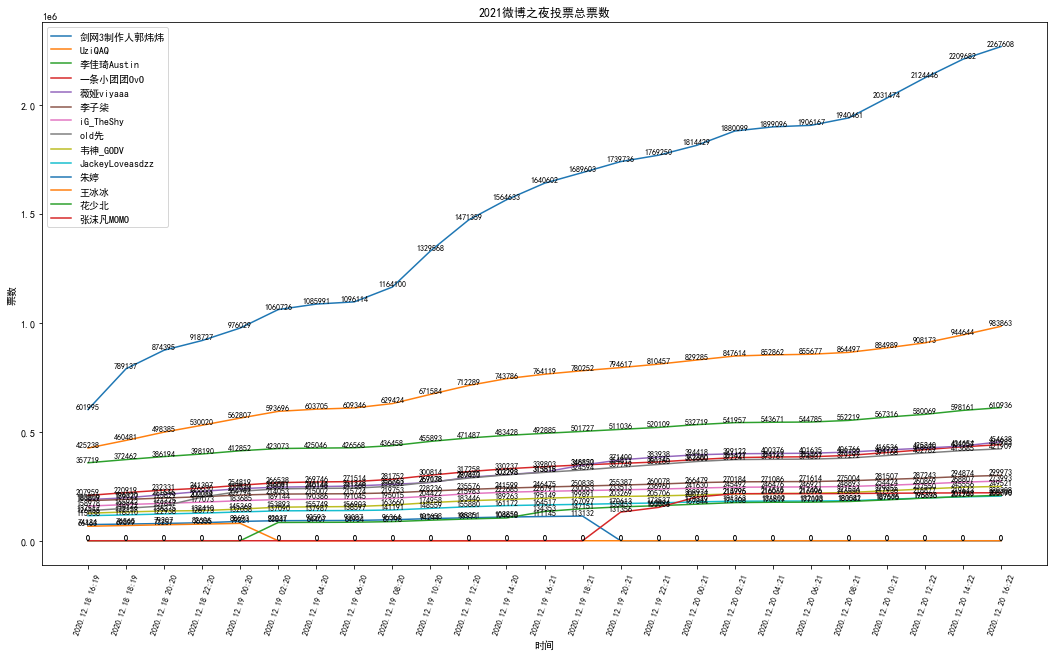

In [7]:
plot_data(data_2020, step = 6, show = True)

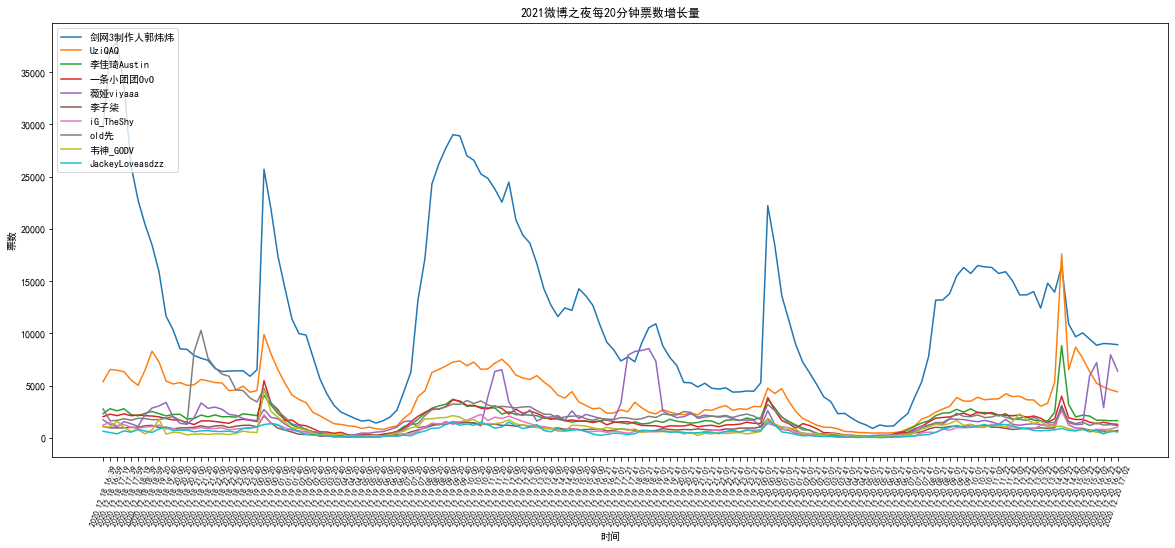

In [8]:
plot_inc_rate(data_2020, step = 1)

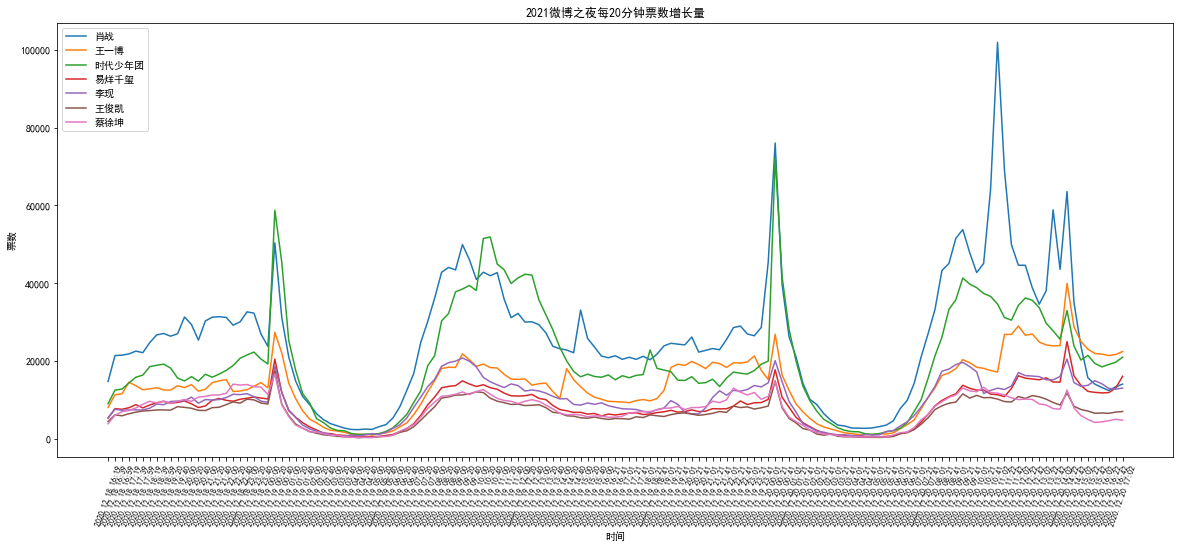

In [9]:
data_star = csv_creater("../get_data/star_data")
plot_inc_rate(data_star, step = 1)